In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
filename = 'P:/CoxaAI/preprocess_data/csv_detection_info/sortering 3/EE.csv'
filename_clean = 'P:/CoxaAI/preprocess_data/csv_detection_info_clean/sortering 3/EE.csv'
saved_cropped_image = 'P:/CoxaAI/preprocess_data/cropped/sortering 3/EE'

In [3]:
detection_df = pd.read_csv(filename)

In [4]:
detection_df

base_path  \
0    P:/CoxaAI/Sortering 3/EE   
1    P:/CoxaAI/Sortering 3/EE   
2    P:/CoxaAI/Sortering 3/EE   
3    P:/CoxaAI/Sortering 3/EE   
4    P:/CoxaAI/Sortering 3/EE   
..                        ...   
186  P:/CoxaAI/Sortering 3/EE   
187  P:/CoxaAI/Sortering 3/EE   
188  P:/CoxaAI/Sortering 3/EE   
189  P:/CoxaAI/Sortering 3/EE   
190  P:/CoxaAI/Sortering 3/EE   

                                              filename parent_name  \
0    1.2.276.0.82.1.1.1430.784099785.192.168.1.36.6...  1-20013073   
1    1.2.276.0.82.1.1.1430.784099785.192.168.1.36.6...  1-20013073   
2    1.2.276.0.82.1.1.1430.784099785.192.168.1.36.6...  1-20013073   
3    1.2.276.0.82.1.1.1430.784099785.192.168.1.36.6...  1-20013073   
4    1.2.392.200036.9107.500.220.24201.20201223.180...  1-20094685   
..                                                 ...         ...   
186  1.2.276.0.95.29091.1.20221216.92700.0.2.29809.dcm  1-22116833   
187  1.2.276.0.95.29091.1.20221216.92700.0.2.29809.dcm  1-22116833   
188  1.3.51.0.7.12938536696.50969.8010.40216.49969....  1-22117419   
189           1.2.276.0.95.18255.20221221.151241.0.dcm  1-22118417   
190           1.2.276.0.95.18255.20221221.152729.0.dcm  1-22118417   

                                             crop_name  ax0_min  ax0_max  \
0    1.2.276.0.82.1.1.1430.784099785.192.168.1.36.6...     1417     1713   
1    1.2.276.0.82.1.1.1430.784099785.192.168.1.36.6...     1402     1656   
2    1.2.276.0.82.1.1.1430.784099785.192.168.1.36.6...     1418     1702   
3    1.2.276.0.82.1.1.1430.784099785.192.168.1.36.6...     1428     1683   
4    1.2.392.200036.9107.500.220.24201.20201223.180...     1187     1302   
..                                                 ...      ...      ...   
186  1.2.276.0.95.29091.1.20221216.92700.0.2.29809....      530      653   
187  1.2.276.0.95.29091.1.20221216.92700.0.2.29809....      498      616   
188  1.3.51.0.7.12938536696.50969.8010.40216.49969....      995     1184   
189        1.2.276.0.95.18255.20221221.151241.0.dcm_h1      995     1184   
190        1.2.276.0.95.18255.20221221.152729.0.dcm_h1      995     1184   

     ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  
0       2154     2387    0.407365       False          4            EE  
1       1121     1309    0.357080       False          4            EE  
2       1143     1367    0.348840       False          4            EE  
3       2203     2393    0.322490       False          4            EE  
4        833      922    0.990125       False          4            EE  
..       ...      ...         ...         ...        ...           ...  
186     1211     1302    0.945763       False          4            EE  
187      680      770    0.359334       False          4            EE  
188      460      600    0.549844       False          4            EE  
189      460      600    0.000000        True          4            EE  
190      460      600    0.000000        True          4            EE  

[191 rows x 12 columns]

### [Optional] Sort by confidence (filter out bad prediction)

In [5]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [6]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([  0,   1,   2,   3,  31,  32,  34,  66,  68,  84,  96, 120, 126,
            131, 139, 169, 170, 171, 187, 189, 190],
           dtype='int64')

Note that there many cases that are not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [7]:
# plot every 9 of them

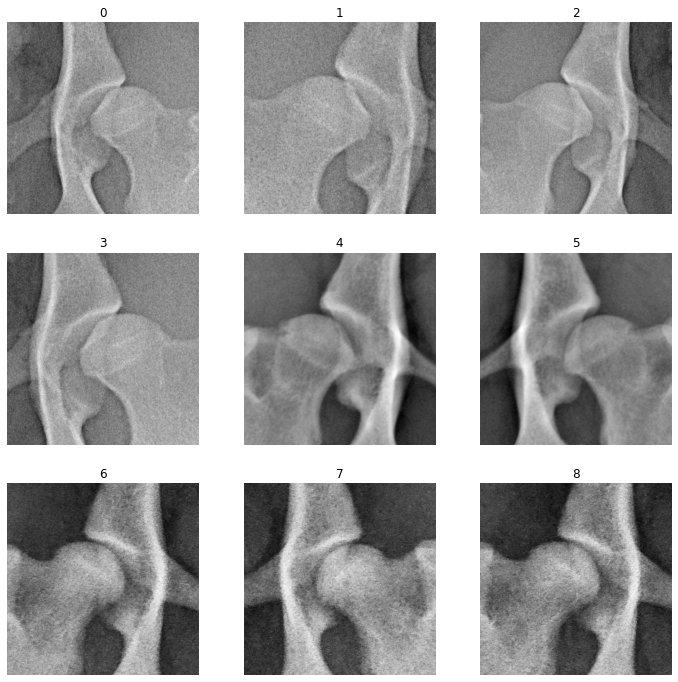

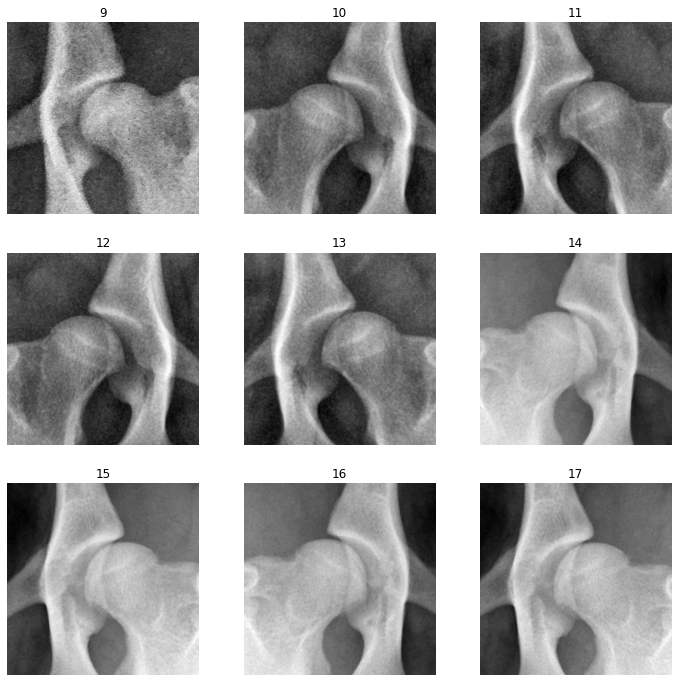

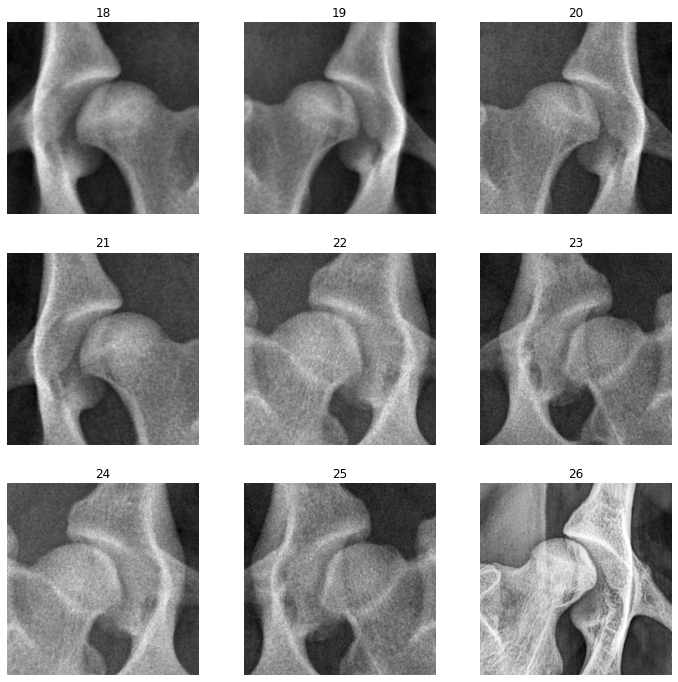

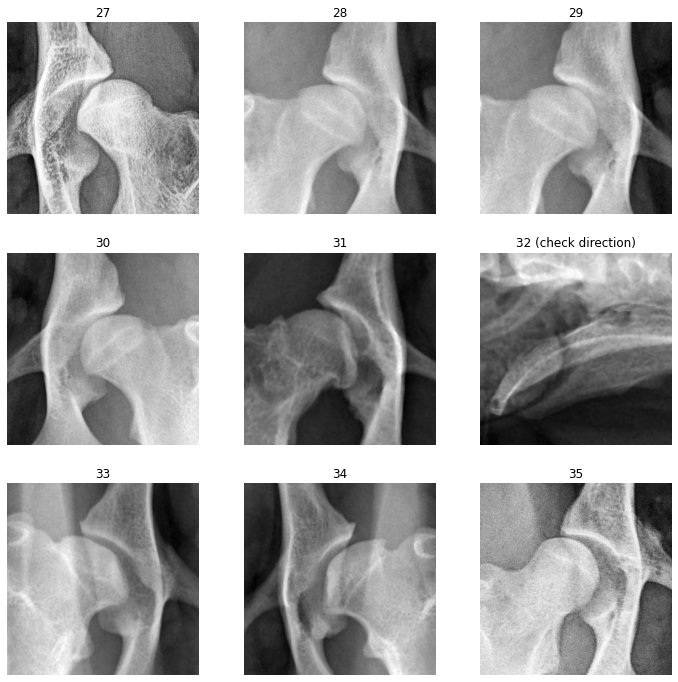

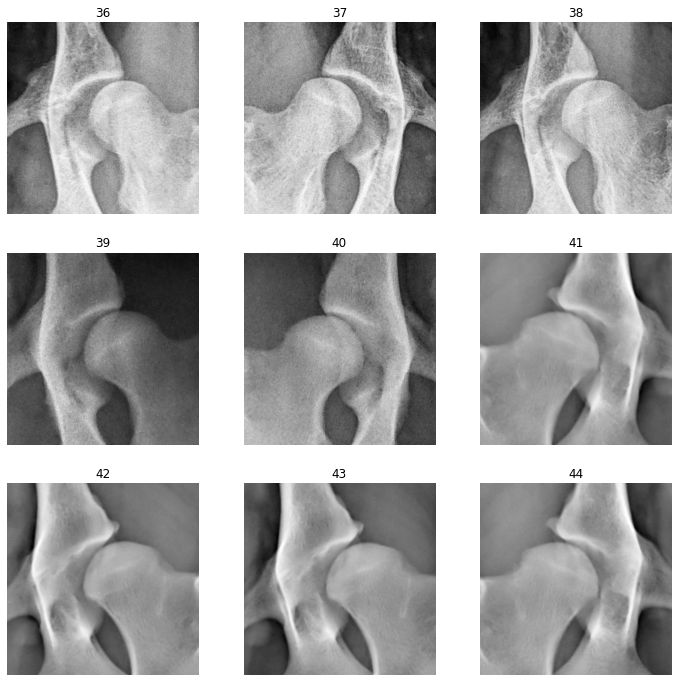

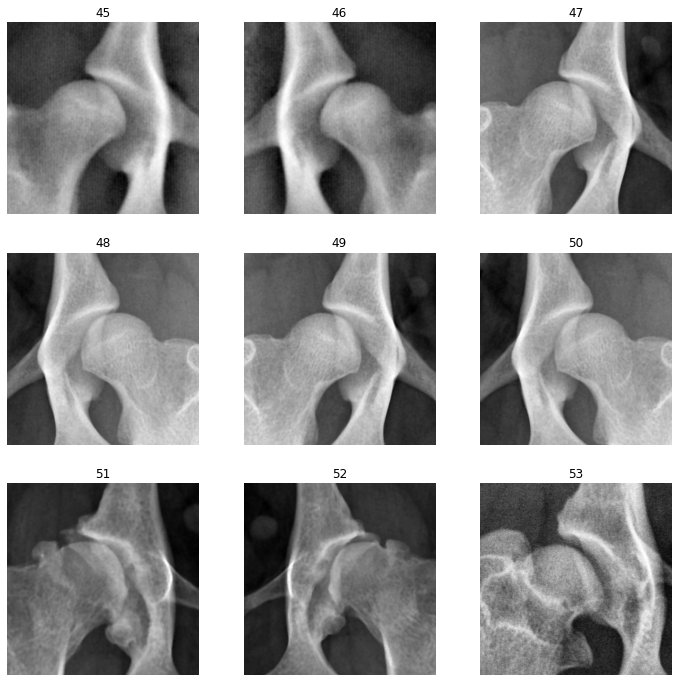

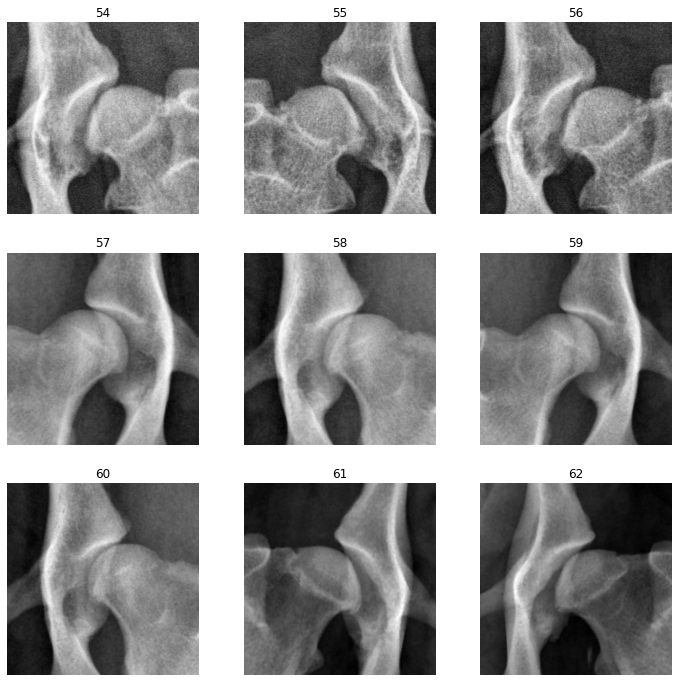

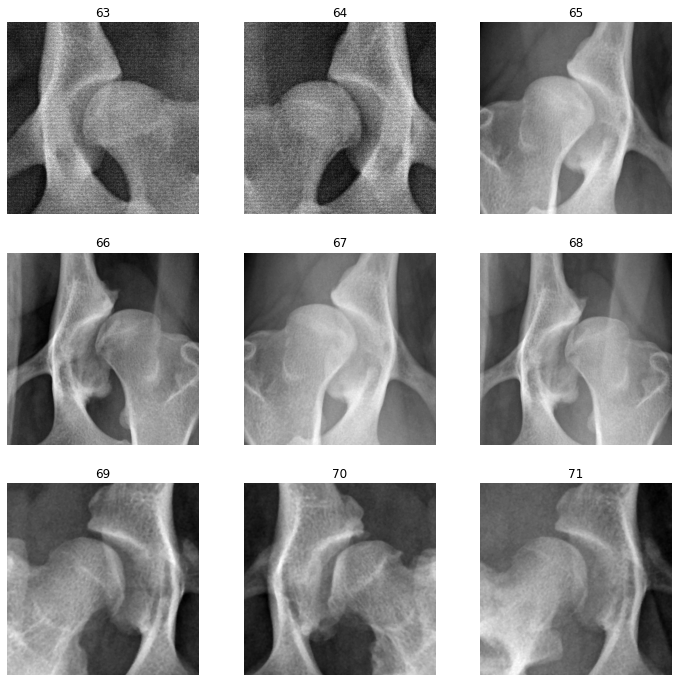

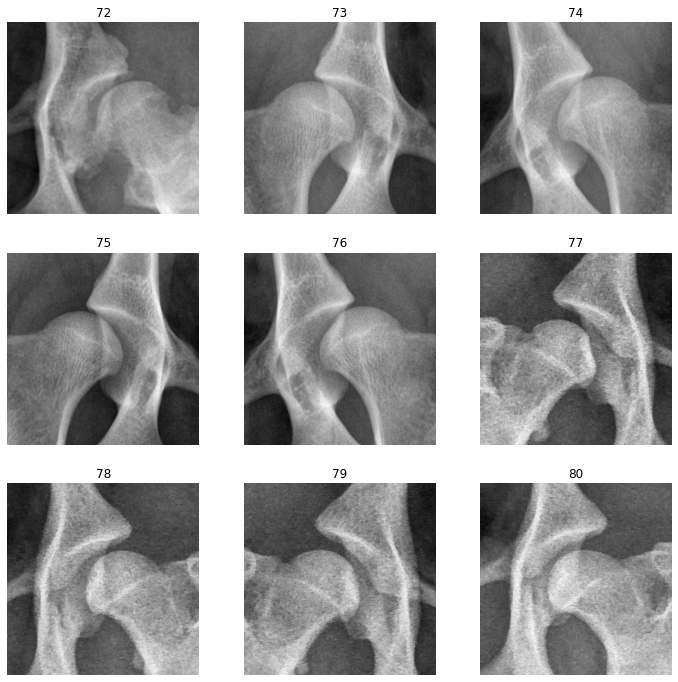

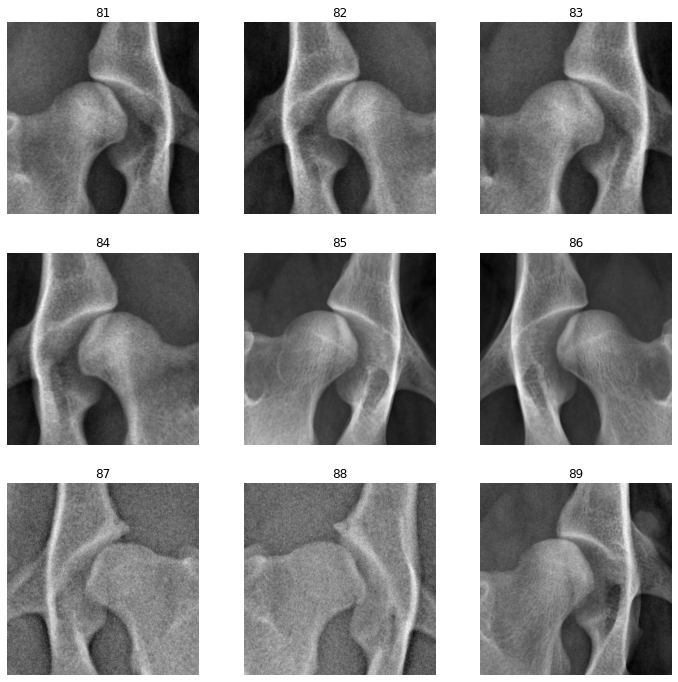

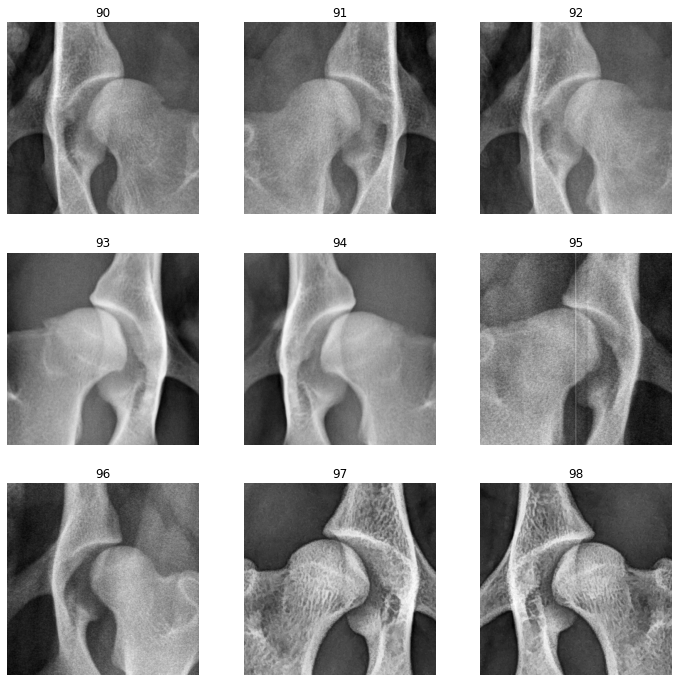

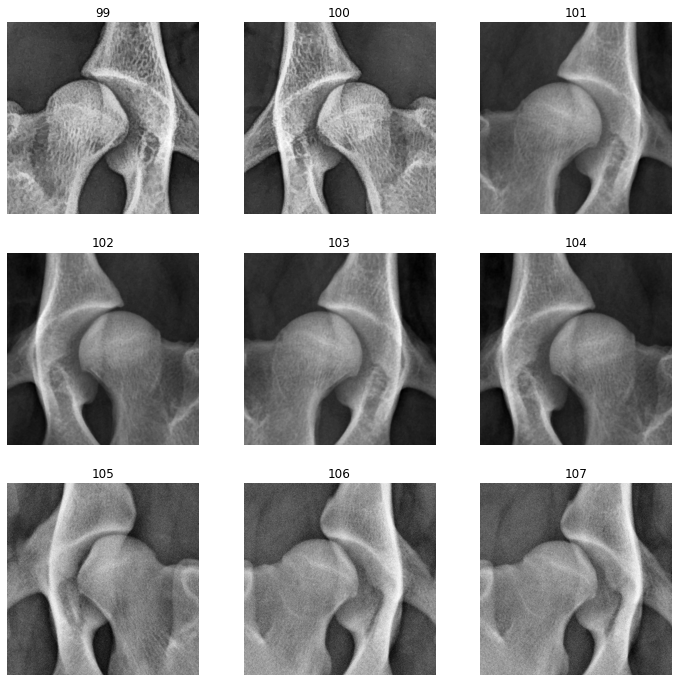

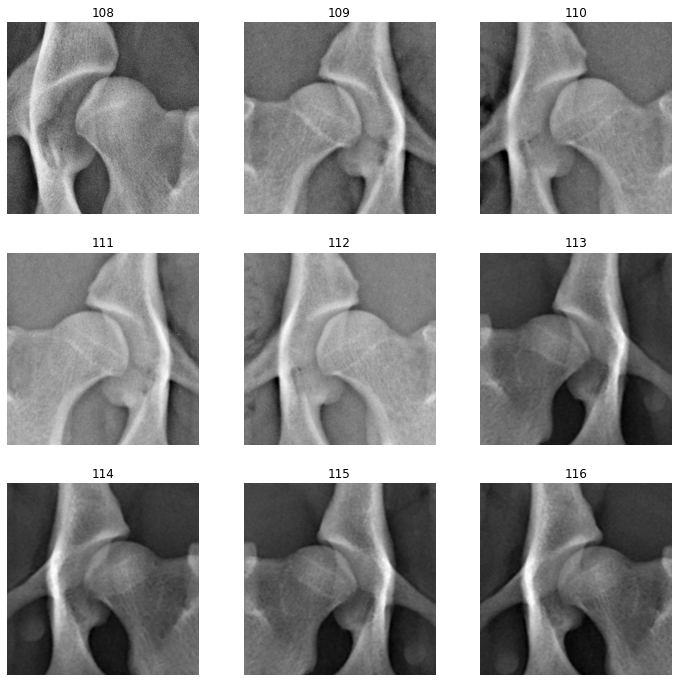

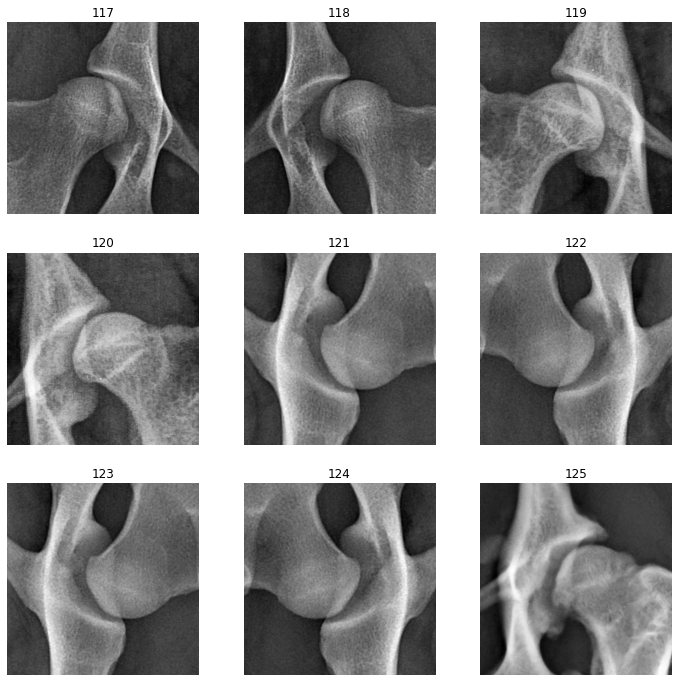

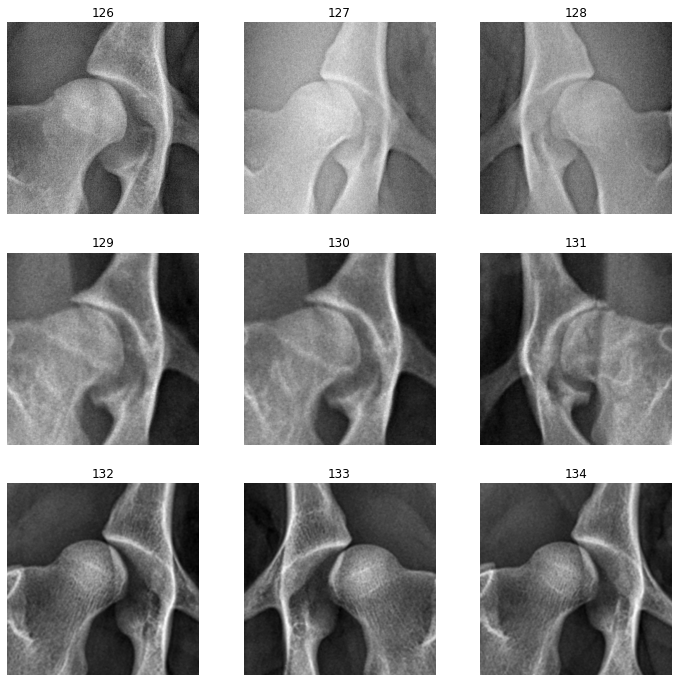

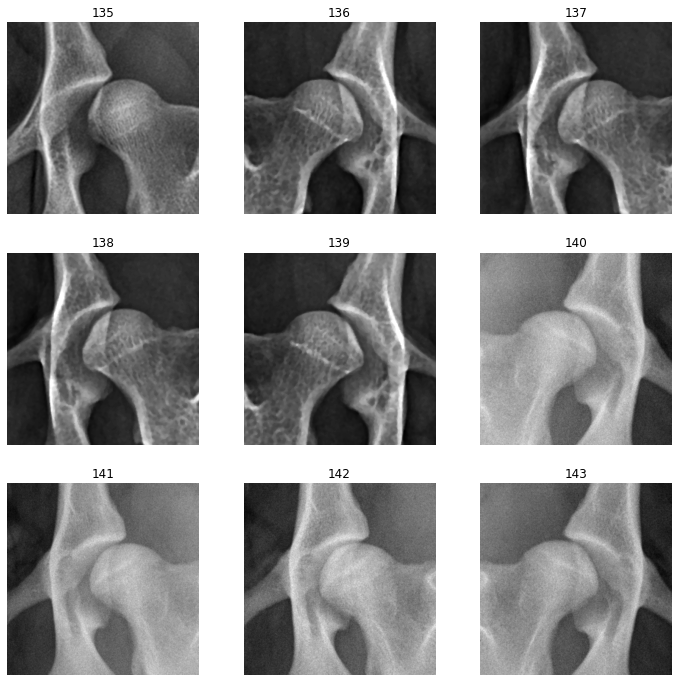

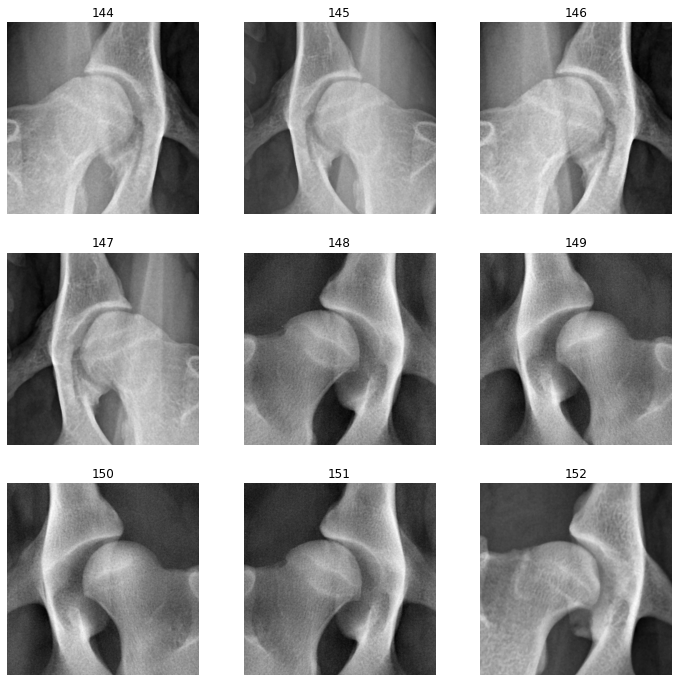

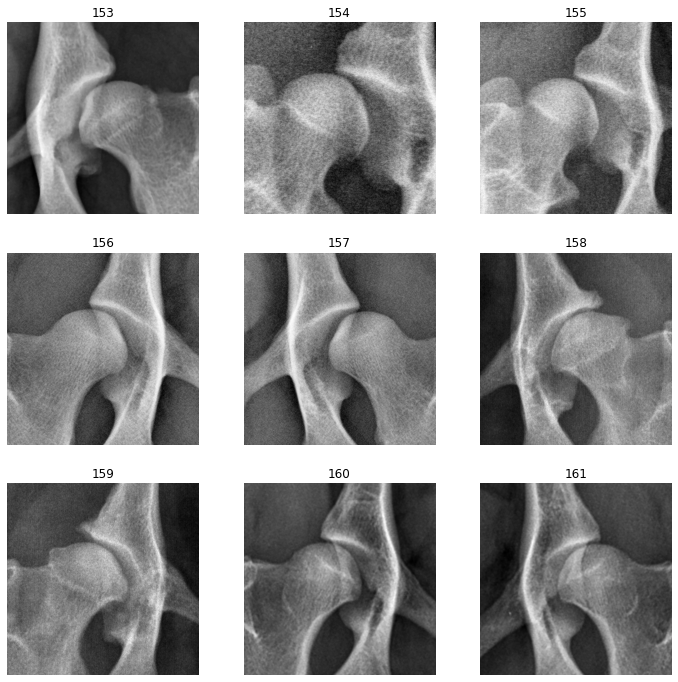

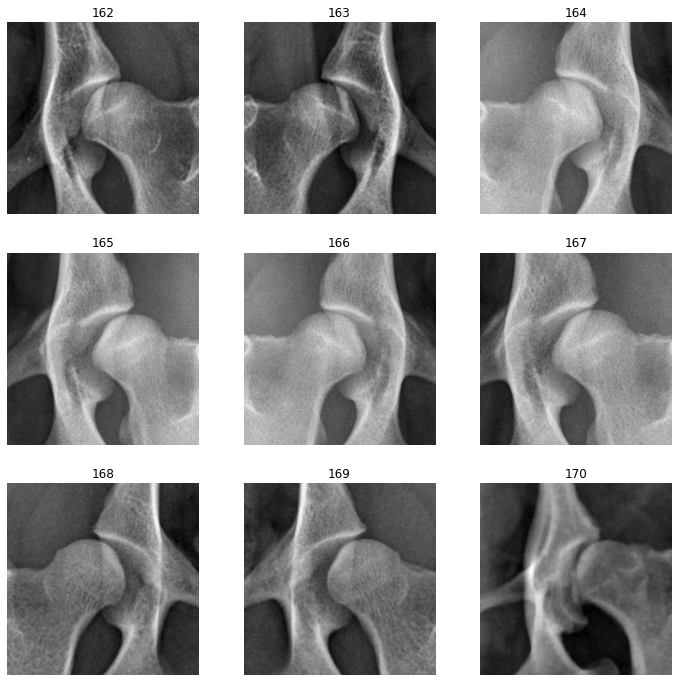

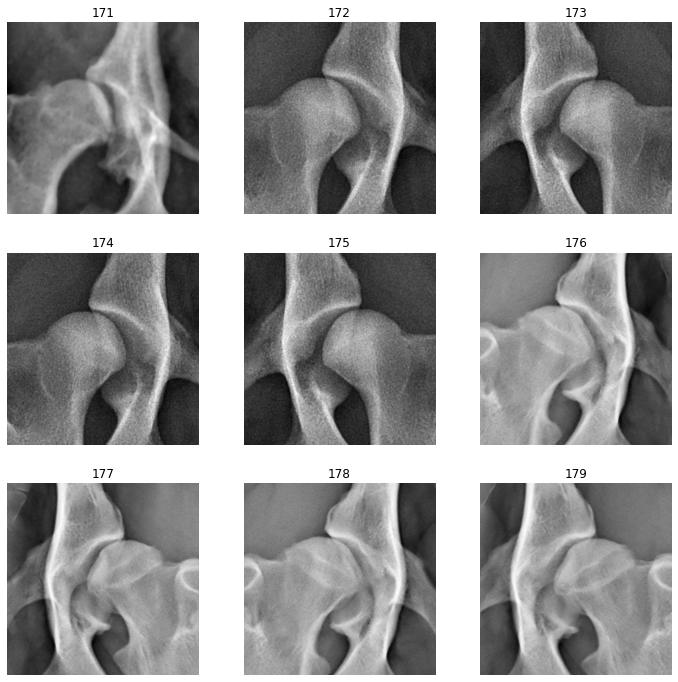

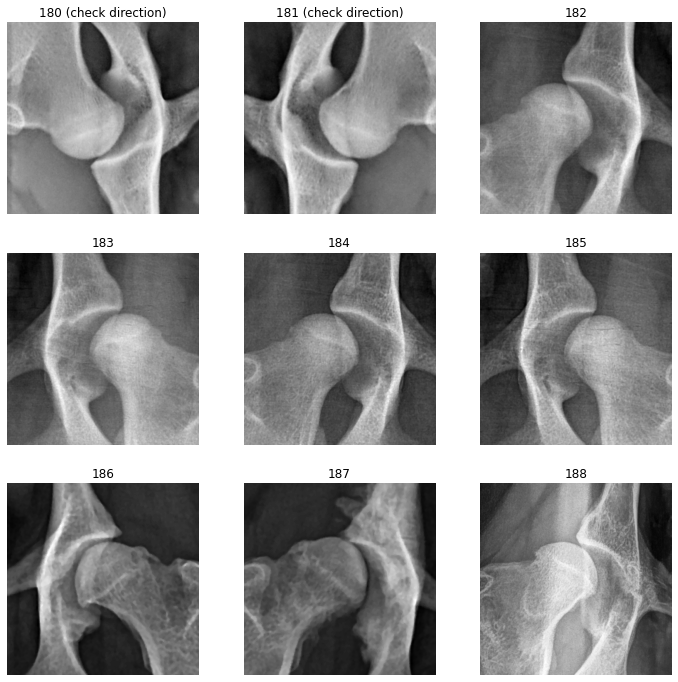

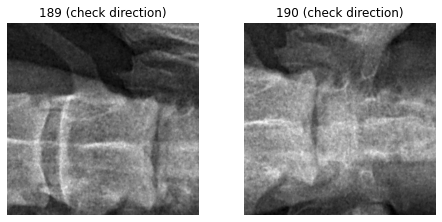

In [8]:
for id, item in detection_df.iterrows():
    fn = item['crop_name']
    img = np.load(os.path.join(saved_cropped_image,fn + '.npy'))
    suffix = ' (check direction)' if item['is_rotated'] else ''
#     parent = item['parent_name']
#     if not pd.isnull(parent):
#         img = np.load(os.path.join(saved_cropped_image, parent,fn + '.npy'))
#     else:
#         img = np.load(os.path.join(saved_cropped_image,fn + '.npy'))
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id)+suffix)

    if (id%9) == 8:
        plt.show()                    
        
plt.show()

## Assign "flipped" column before removing failed predictions

In [9]:
flipped = np.array([False] * detection_df.shape[0])
flipped_indice = [121, 122, 123, 124, 180, 181]
flipped[detection_df.index.isin(flipped_indice)] = True
detection_df['flipped'] = flipped

## Remove bad detection items

In [10]:
remove_indice = [32, 189, 190]
detection_df[~detection_df.index.isin(remove_indice)]

base_path  \
0    P:/CoxaAI/Sortering 3/EE   
1    P:/CoxaAI/Sortering 3/EE   
2    P:/CoxaAI/Sortering 3/EE   
3    P:/CoxaAI/Sortering 3/EE   
4    P:/CoxaAI/Sortering 3/EE   
..                        ...   
184  P:/CoxaAI/Sortering 3/EE   
185  P:/CoxaAI/Sortering 3/EE   
186  P:/CoxaAI/Sortering 3/EE   
187  P:/CoxaAI/Sortering 3/EE   
188  P:/CoxaAI/Sortering 3/EE   

                                              filename parent_name  \
0    1.2.276.0.82.1.1.1430.784099785.192.168.1.36.6...  1-20013073   
1    1.2.276.0.82.1.1.1430.784099785.192.168.1.36.6...  1-20013073   
2    1.2.276.0.82.1.1.1430.784099785.192.168.1.36.6...  1-20013073   
3    1.2.276.0.82.1.1.1430.784099785.192.168.1.36.6...  1-20013073   
4    1.2.392.200036.9107.500.220.24201.20201223.180...  1-20094685   
..                                                 ...         ...   
184  1.2.276.0.95.16625.1.20221214.114251.0.2.7511.dcm  1-22116528   
185  1.2.276.0.95.16625.1.20221214.114251.0.2.7511.dcm  1-22116528   
186  1.2.276.0.95.29091.1.20221216.92700.0.2.29809.dcm  1-22116833   
187  1.2.276.0.95.29091.1.20221216.92700.0.2.29809.dcm  1-22116833   
188  1.3.51.0.7.12938536696.50969.8010.40216.49969....  1-22117419   

                                             crop_name  ax0_min  ax0_max  \
0    1.2.276.0.82.1.1.1430.784099785.192.168.1.36.6...     1417     1713   
1    1.2.276.0.82.1.1.1430.784099785.192.168.1.36.6...     1402     1656   
2    1.2.276.0.82.1.1.1430.784099785.192.168.1.36.6...     1418     1702   
3    1.2.276.0.82.1.1.1430.784099785.192.168.1.36.6...     1428     1683   
4    1.2.392.200036.9107.500.220.24201.20201223.180...     1187     1302   
..                                                 ...      ...      ...   
184  1.2.276.0.95.16625.1.20221214.114251.0.2.7511....     1094     1306   
185  1.2.276.0.95.16625.1.20221214.114251.0.2.7511....     1092     1306   
186  1.2.276.0.95.29091.1.20221216.92700.0.2.29809....      530      653   
187  1.2.276.0.95.29091.1.20221216.92700.0.2.29809....      498      616   
188  1.3.51.0.7.12938536696.50969.8010.40216.49969....      995     1184   

     ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  \
0       2154     2387    0.407365       False          4            EE   
1       1121     1309    0.357080       False          4            EE   
2       1143     1367    0.348840       False          4            EE   
3       2203     2393    0.322490       False          4            EE   
4        833      922    0.990125       False          4            EE   
..       ...      ...         ...         ...        ...           ...   
184      939     1102    0.803971       False          4            EE   
185     1706     1871    0.788899       False          4            EE   
186     1211     1302    0.945763       False          4            EE   
187      680      770    0.359334       False          4            EE   
188      460      600    0.549844       False          4            EE   

     flipped  
0      False  
1      False  
2      False  
3      False  
4      False  
..       ...  
184    False  
185    False  
186    False  
187    False  
188    False  

[188 rows x 13 columns]

In [11]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [12]:
exclude_ids = pd.read_csv('exclude_id.csv').id.values
new_detection_df = new_detection_df[~new_detection_df.parent_name.isin(exclude_ids)]
print(new_detection_df.shape)

(188, 13)


In [13]:
new_detection_df.to_csv(filename_clean, index=False)

In [14]:
detection_df[detection_df.index.isin(remove_indice)]

base_path                                  filename  \
32   P:/CoxaAI/Sortering 3/EE  1.2.276.0.95.31951.20210115.145032.0.dcm   
189  P:/CoxaAI/Sortering 3/EE  1.2.276.0.95.18255.20221221.151241.0.dcm   
190  P:/CoxaAI/Sortering 3/EE  1.2.276.0.95.18255.20221221.152729.0.dcm   

    parent_name                                    crop_name  ax0_min  \
32   1-21007215  1.2.276.0.95.31951.20210115.145032.0.dcm_h1      674   
189  1-22118417  1.2.276.0.95.18255.20221221.151241.0.dcm_h1      995   
190  1-22118417  1.2.276.0.95.18255.20221221.152729.0.dcm_h1      995   

     ax0_max  ax1_min  ax1_max  confidence  is_rotated  diagnosis  \
32       768      338      413         0.0        True          4   
189     1184      460      600         0.0        True          4   
190     1184      460      600         0.0        True          4   

    diagnosis_raw  flipped  
32             EE    False  
189            EE    False  
190            EE    False